# ISIP HW2
## Thibault Schowing



# Exercise 1 Linear Filtering - [7 Points]

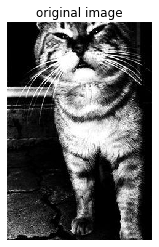

1.3: create a boxfilter of size 11 and convolve this filter with your image - show the result
Note: box filter (left) - linear filter is [1,0,1] (right)
(1, 3)


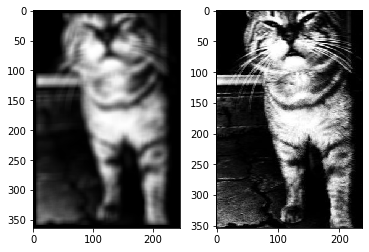

1.3 - DONE
1.4 - Display 1d gaussian filter (length 15)
(1, 15)
[[0.00884695 0.01821591 0.0335624  0.05533504 0.08163802 0.10777793
  0.12732458 0.13459835 0.12732458 0.10777793 0.08163802 0.05533504
  0.0335624  0.01821591 0.00884695]]


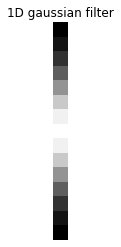

1.4 - DONE
1.5 - Display a 2d gaussian filter with sigma=3 and size 11x11


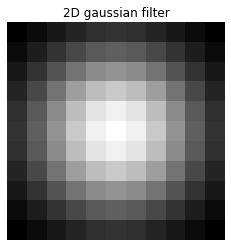

1.5 - DONE
1.6: run your gconv on the image for sigma=3 and display the result


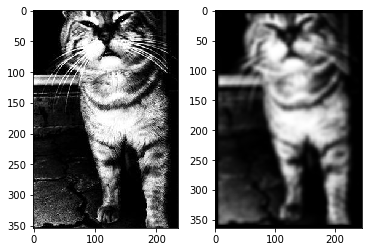

1.6 - DONE
1.8 - Computation time vs filter size experiment


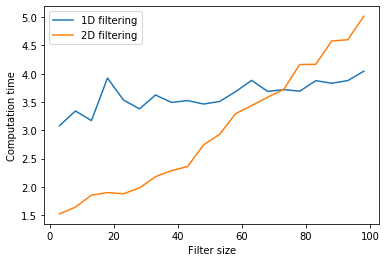

1.8 - DONE


In [22]:
""" 1 Linear filtering """

# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams["figure.figsize"] = (30,20)
import time
import math
import pdb

# To display plots inline
%matplotlib inline

img = plt.imread('cat.jpg').astype(np.float32)

plt.imshow(img)
plt.axis('off')
plt.title('original image')
plt.show()

# 1.1
def boxfilter(n):
    # this function returns a box filter of size nxn
    ### your code should go here ###
    return 1/(n**2) * np.ones((n,n))


# 1.2
# Implement full convolution
def myconv2(image, filt, correct_margins=False):
    
    # Note-parameter: for 1D filters the dimension must be (x,1) and not (x,)
    m = image.shape[0] # height
    n = image.shape[1] # width
    (k,l) = filt.shape
    
    # Output empty image
    # note to me: do not correct margins in the end!!!
    filtered_img = np.zeros((m + k - 1, n + l - 1))
    
    # Filter features
    filt_h = k // 2
    filt_w = l // 2
    
    # padded original image with 0 border (read only)
    pad_image = np.zeros((m + k - 1, n + l - 1))
    pad_image[filt_h:filt_h + m, filt_w:filt_w + n] = image[:,:]
    
    # Flatten and reverse the filter for the convolution
    flat_rev_filt = np.flip(filt.flatten(), axis=0)
    # Sum of filter's elements (used in convolution formula bellow)
    fs = sum(flat_rev_filt)
    if(fs == 0):
        fs = 1
    
    for h in range(filt_h, m + filt_h):
        for w in range(filt_w, n + filt_w): 
            window = pad_image[h - filt_h : h + filt_h + 1, w - filt_w : w + filt_w + 1]
            val = (1/fs)*np.sum(np.multiply(flat_rev_filt, window.flatten()))
            filtered_img[h,w] = val
            
    if(correct_margins):
        return filtered_img[filt_h : m + filt_h, filt_w : n + filt_w]
    
    return filtered_img

# 1.3
# create a boxfilter of size 11 and convolve this filter with your image - show the result
print("1.3: create a boxfilter of size 11 and convolve this filter with your image - show the result")
print("Note: box filter (left) - linear filter is [1,0,1] (right)")
bsize = 11

### your code should go here ###

a = boxfilter(bsize)
b = myconv2(img, a) # convolve the random box filter with the cat image

# Repeat with a linear filter
a = np.array([1,0,1])[np.newaxis, :]
print(a.shape)
c = myconv2(img,a)

# Plot the results with box filter and linear filter
f = plt.figure()
ax = f.add_subplot(1,2, 1)
plt.imshow(b)
f.add_subplot(1,2, 2)
plt.imshow(c)
plt.show(block=True)

ax.set_title('1.3')

print("1.3 - DONE")

# 1.4
# create a function returning a 1D gaussian kernel
def gauss1d(sigma, filter_length=11):
    # INPUTS
    # @ sigma         : sigma of gaussian distribution
    # @ filter_length : integer denoting the filter length
    # OUTPUTS
    # @ gauss_filter  : 1D gaussian filter

    ### your code should go here ###
    if(not(filter_length%2)):
        filter_length += 1
    
    # Creage vector with distances from the center
    lim = int(filter_length/2)
    x = np.array(range(-lim,lim+1,1)) 
    
    
    gauss_filter = np.exp(-(x**2/(2*(sigma**2))))
    
    # Normalize to sum 1
    gauss_filter = gauss_filter/sum(gauss_filter)
    
    
    return gauss_filter[np.newaxis, :]


# 1.5
# create a function returning a 2D gaussian kernel
def gauss2d(sigma, filter_size=11):
    # INPUTS
    # @ sigma         : sigma of gaussian distribution
    # @ filter_size   : integer denoting the filter size
    # OUTPUTS
    # @ gauss2d_filter  : 2D gaussian filter

    ### your code should go here ###
    if(not(filter_size%2)):
        filter_size += 1
    
    # source: https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-79.php
    
    # Interval limits
    fs = int(filter_size/2)
    # x and y grid
    x, y = np.meshgrid(np.linspace(-fs,fs,filter_size), np.linspace(-fs,fs,filter_size))
    
    d = np.sqrt(x*x+y*y)
    gauss2d_filter = (1/(2 * math.pi * (sigma)**2)) * np.exp(-( d**2 / ( 2.0 * sigma**2 ) ) )
    
    return gauss2d_filter

# Display a plot using sigma = 3
sigma = 3

### your code should go here ###
print("1.4 - Display 1d gaussian filter (length 15)")
print(gauss1d(sigma, filter_length=15).shape)
print(gauss1d(sigma, filter_length=15))
plt.imshow(np.array(gauss1d(sigma, filter_length=15)).reshape(15,1))
plt.axis('off')
plt.title('1D gaussian filter')
plt.show()

print("1.4 - DONE")
print("1.5 - Display a 2d gaussian filter with sigma=3 and size 11x11")

plt.imshow(np.array(gauss2d(sigma, filter_size=11)))
plt.axis('off')
plt.title('2D gaussian filter')
plt.show()

print("1.5 - DONE")

# 1.6
# Convoltion with gaussian filter
def gconv(image, sigma):
    # INPUTS
    # image           : 2d image
    # @ sigma         : sigma of gaussian distribution
    # OUTPUTS
    # @ img_filtered  : filtered image with gaussian filter

    ### your code should go here ###
    
    img_filtered = myconv2(image, gauss2d(sigma))
    
    # NOTE: what about the size ? - this just uses the 2D gaussian filter (not optimal) with default values
    #       the optimal solution uses twice myconv2 with the 1d gaussian and its transpose but the size has 
    #       to be specified.

    return img_filtered


# run your gconv on the image for sigma=3 and display the result
### your code should go here ###

print("1.6: run your gconv on the image for sigma=3 and display the result")
sigma = 3
# default filter size = 11
gimage = gconv(img, sigma)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img)
f.add_subplot(1,2, 2)
plt.imshow(gimage)
plt.show(block=True)

print("1.6 - DONE")


# 1.7
# Convolution with a 2D Gaussian filter is not the most efficient way
# to perform Gaussian convolution with an image. In a few sentences, explain how
# this could be implemented more efficiently and why this would be faster.
#
# HINT: How can we use 1D Gaussians?

### your explanation should go here ###
#
#> We can convolve each row with a 1d filter and do it again for each row. For
#> a 3x3 box filter, we can see that we can get rid of the corner values -> we
#> gain memory space (small) and reduce the number of operations needed. 

# 1.8
# Computation time vs filter size experiment
print("1.8 - Computation time vs filter size experiment")
size_range = np.arange(3, 103, 5)
sigma = 3
t1d = []
t2d = []
#for size in size_range:

    ### your code should go here ###
for size in size_range: 
    # 1d Filtering
    start = time.time()
    g = gauss1d(sigma, size)
    tmp = myconv2(img, g)
    tmp2 = myconv2(tmp, g.T)
    stop = time.time()
    t1d.append(stop-start)
    
    # 2d filtering
    start = time.time()
    g = gauss2d(sigma, size)
    tmp = myconv2(img, g)
    stop = time.time()
    t2d.append(stop-start)

# plot the comparison of the time needed for each of the two convolution cases
plt.plot(size_range, t1d, label='1D filtering')
plt.plot(size_range, t2d, label='2D filtering')
plt.xlabel('Filter size')
plt.ylabel('Computation time')
plt.legend(loc=0)
plt.show()

print("1.8 - DONE")

# Comment: 
# at a size of approximately 60 to 90 (depending if Netflix is on or not), 
# the 2D filtering starts to take more time than the 2x1D filtering. 

# Part 2

start - Copy part 1 functions ...  
DONE
2.1 - Gradients - derivative operator
(1, 3)
(3, 1)
2.1 - DONE
2.2 - Gradient Edge Magnitude Map


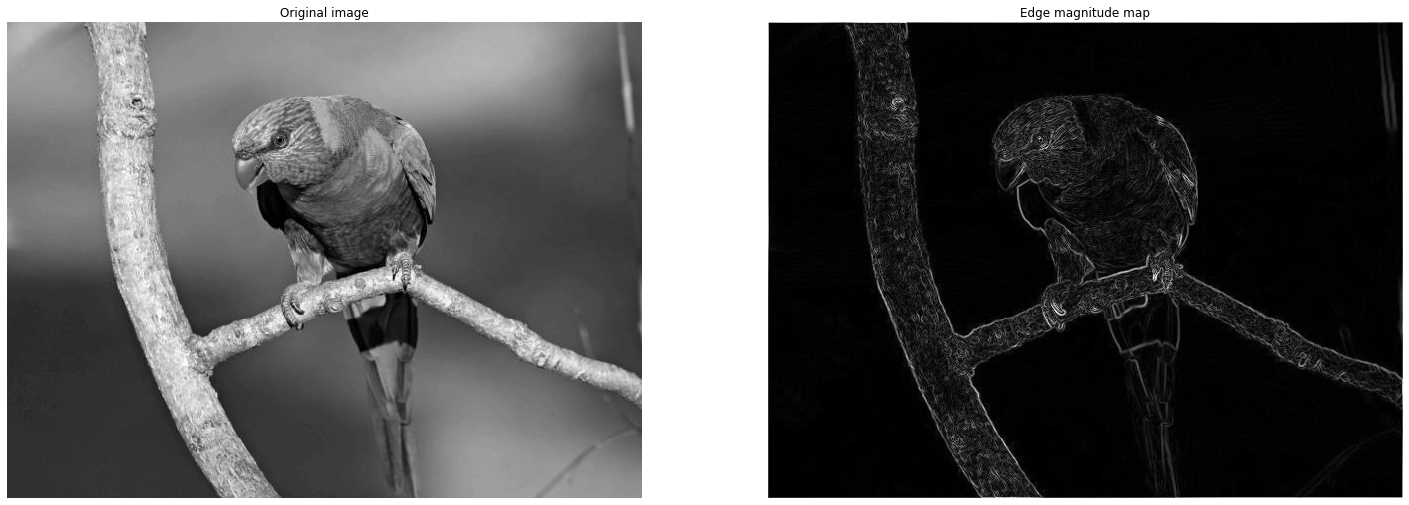

2.2 - DONE
2.3 - Edge images of particular directions


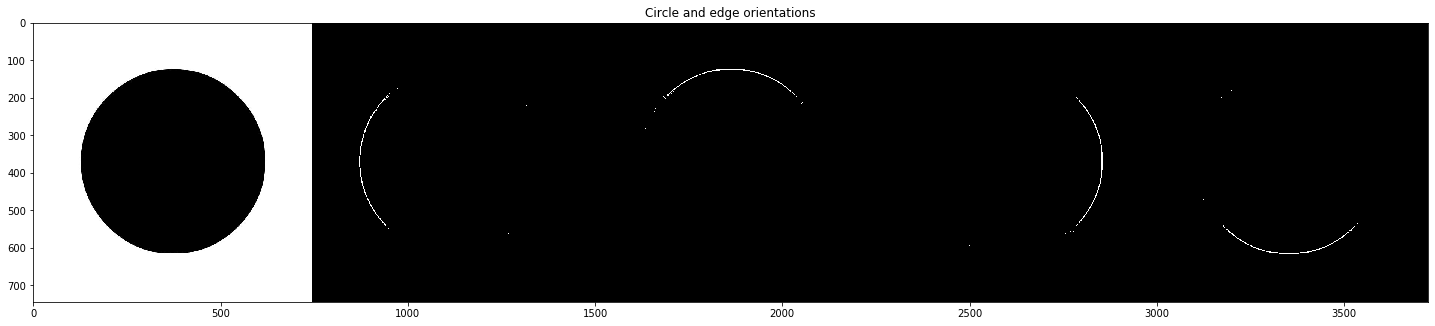

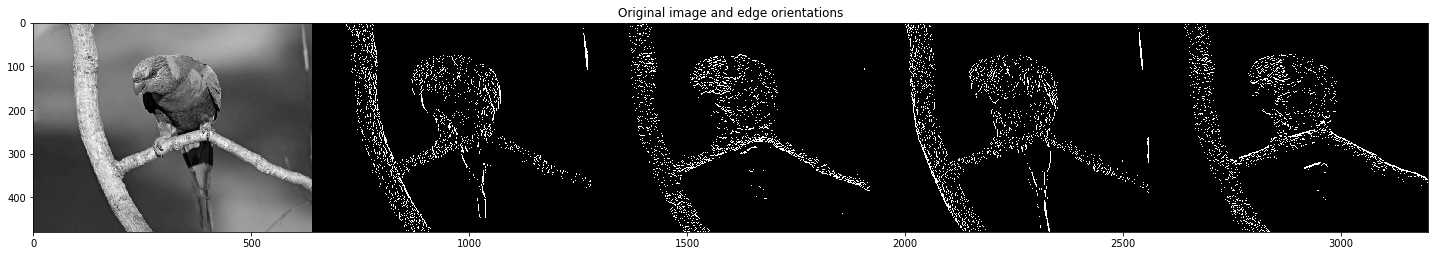

2.3 - DONE


In [23]:
""" 2 Finding edges """
%matplotlib inline
import numpy as np
from skimage import color, io
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams["figure.figsize"] = (25,20)
import pdb

from scipy import interp

# load image
img = io.imread('bird.jpg')

print("start - Copy part 1 functions ...  ")
### copy functions myconv2, gauss1d, gauss2d and gconv from exercise 1 ###
#################################################
### Compact version - for comments see part 1 ### 
#################################################
def myconv2(image, filt, correct_margins = False):
    m = image.shape[0] # height
    n = image.shape[1] # width
    (k,l) = filt.shape
    filtered_img = np.zeros((m + k - 1, n + l - 1))
    filt_h = k // 2
    filt_w = l // 2
    pad_image = np.zeros((m + k - 1, n + l - 1))
    pad_image[filt_h:filt_h + m, filt_w:filt_w + n] = image[:,:]
    flat_rev_filt = np.flip(filt.flatten(), axis=0)
    fs = sum(flat_rev_filt)
    if(fs == 0):
        fs = 1
    
    for h in range(filt_h, m + filt_h):
        for w in range(filt_w, n + filt_w): 
            window = pad_image[h - filt_h : h + filt_h + 1, w - filt_w : w + filt_w + 1]
            val = (1/fs)*np.sum(np.multiply(flat_rev_filt, window.flatten()))
            filtered_img[h,w] = val
    
    if(correct_margins):
        return filtered_img[filt_h : m + filt_h, filt_w : n + filt_w]
    return filtered_img

def gauss1d(sigma, filter_length=11):
    if(not(filter_length%2)):
        filter_length += 1
    lim = int(filter_length/2)
    x = np.array(range(-lim,lim+1,1)) 
    gauss_filter = np.exp(-(x**2/(2*(sigma**2))))
    gauss_filter = gauss_filter/sum(gauss_filter)
    return gauss_filter[np.newaxis, :]

def gauss2d(sigma, filter_size=11):
    if(not(filter_size%2)):
        filter_size += 1
    x, y = np.meshgrid(np.linspace(-fs,fs,filter_size), np.linspace(-fs,fs,filter_size))
    d = np.sqrt(x*x+y*y)
    gauss2d_filter = (1/(2 * math.pi * (sigma)**2)) * np.exp(-( d**2 / ( 2.0 * sigma**2 ) ) )
    return gauss2d_filter

def gconv(image, sigma):
    # Note: see note in part 1
    return myconv2(image, gauss2d(sigma))

print("DONE")
###########################################################################
# 2.1
# Gradients
# define a derivative operator
print("2.1 - Gradients - derivative operator")
dx = np.array((-1, 0, 1))[np.newaxis, :]
print(dx.shape)
dy = dx.T
print(dy.shape)


# convolve derivative operator with a 1d gaussian filter with sigma = 1
# You should end up with 2 1d edge filters,  one identifying edges in the x direction, and
# the other in the y direction
sigma = 1

### your code should go here 

# Note: the parameter correct_margins remove the additional margins added for convolution
gdx = myconv2(dx, gauss1d(sigma, 3), True)
gdy = gdx.T

print("2.1 - DONE")
# 2.2
# Gradient Edge Magnitude Map
print("2.2 - Gradient Edge Magnitude Map")
def create_edge_magn_image(image, dx, dy):
    # this function created an edge magnitude map of an image
    # for every pixel in the image, it assigns the magnitude of gradients
    # INPUTS
    # @image  : a 2D image
    # @gdx     : gradient along x axis
    # @gdy     : geadient along y axis
    # OUTPUTS
    # @ grad_mag_image  : 2d image same size as image, with the magnitude of gradients in every pixel
    # @grad_dir_image   : 2d image same size as image, with the direcrion of gradients in every pixel

    ### your code should go here ###
    
    # Note: here should we use gdx and gdy from 2.1 ?? (in the HW2 pdf it's said to use dx and dy)
    
    # Convolution in both directions with removal of added margins
    ix = myconv2(image, dx, True)
    iy = myconv2(image, dy, True)
    
    # Magnitude
    grad_mag_image = np.sqrt(ix**2 + iy**2)
    
    # Orientation [-pi : pi]
    grad_dir_image = np.arctan2(iy,ix)
    #print("Gradient direction values before: ", np.amin(grad_dir_image), " - ", np.amax(grad_dir_image))
    # -pi : pi
    
    # Correction of directions (have to be between -pi/4 and 7pi/4)
    grad_dir_image = np.where(grad_dir_image > (-np.pi / 4), grad_dir_image, grad_dir_image + 2*np.pi)
    
    #print("Gradient direction values after: ", np.amin(grad_dir_image), " - ", np.amax(grad_dir_image))
    #> -0.78 : 5.49
    
    return grad_mag_image, grad_dir_image


# create an edge magnitude image using the derivative operator
img_edge_mag, img_edge_dir = create_edge_magn_image(img, gdx, gdy)

# show all together
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')
plt.subplot(122)
plt.imshow(img_edge_mag)
#plt.imshow(img_edge_dir)
plt.axis('off')
plt.title('Edge magnitude map')
plt.show()

print("2.2 - DONE")


# 2.3
# Edge images of particular directions
print("2.3 - Edge images of particular directions")
def make_edge_map(image, dx, dy, verbose=False):
    # INPUTS
    # @image        : a 2D image
    # @dx          : gradient along x axis
    # @dy          : geadient along y axis
    # OUTPUTS:
    # @ edge maps   : a 3D array of shape (image.shape, 4) containing the edge maps on 4 orientations

    ### your code should go here ###
    img_edge_mag, img_edge_dir = create_edge_magn_image(image, dx, dy)
    
    if verbose:
        print("Gradient magnitude values: ", np.amin(img_edge_mag), " - ", np.amax(img_edge_mag))
        print("Gradient direction values: ", np.amin(img_edge_dir), " - ", np.amax(img_edge_dir))
    
    # Zeros arrays - return values
    w = x = y = z = np.zeros(image.shape)
    imgs = [w,x,y,z]
    
    # Border magnitude thresholding
    threshold_magnitude = 20
    mag = np.zeros(img_edge_mag.shape)
    mag[img_edge_mag > threshold_magnitude] = True
    
    # for each orientation (and output picture)
    for m in range(0,4):
        
        if verbose:
            # Quadrant and matching orientation
            print("Quadrant ", m)
            print(((m * 2 * np.pi)/4) - (np.pi / 4) , " : " ,((m * 2 * np.pi)/4) + (np.pi / 4))
        
        idx1 = np.zeros(image.shape)
        idx1 = np.logical_and(img_edge_dir > (((m * 2 * np.pi)/4) - (np.pi / 4)), 
                              img_edge_dir < (((m * 2 * np.pi)/4) + (np.pi / 4)))
        
        
        # Build the picture: direction and magnitude are matching
        imgs[m] = np.logical_and(idx1,mag).astype(int)*255
        
        # Verbose mode shows every single plot in big... why not ?
        if verbose:
            plt.imshow(imgs[m])
            plt.axis('off')
            plt.title('img m')
            plt.show()
        
        
    # Save the result in a numpy array
    edge_map = np.array(imgs)
    # Switch the axis
    edge_map = np.moveaxis(edge_map, 0, -1)
    
    return edge_map


# verify with circle image
circle = plt.imread('circle.jpg')
edge_maps = make_edge_map(circle, dx, dy)
edge_maps_in_row = [edge_maps[:, :, m] for m in range(edge_maps.shape[2])]
all_in_row = np.concatenate((edge_maps_in_row), axis=1)
plt.imshow(np.concatenate((circle, all_in_row), axis=1))
plt.title('Circle and edge orientations')
#plt.imshow(np.concatenate(np.dsplit(edge_maps, edge_maps.shape[2]), axis=0))
plt.show()



# now try with original image
edge_maps = make_edge_map(img, dx, dy)
edge_maps_in_row = [edge_maps[:, :, m] for m in range(edge_maps.shape[2])]
all_in_row = np.concatenate((edge_maps_in_row), axis=1)
plt.imshow(np.concatenate((img, all_in_row), axis=1))
plt.title('Original image and edge orientations')
plt.show()

print("2.3 - DONE")


Note: the edges of the circle are very clear in comparison to the pigeon. With the circle, a threshold (*threshold_magnitude*) of 200 (so edge coef of 200 and above) is largely enough. But to distinguish the bird and to see an orientation difference, a low threshold has to be used with the second picture. With 20 we can see a nice orientation difference on the tree but it adds noise on the first image. 

# Part 3

3.2 - Harris corner detection function
3.1 - Debug
Image shape:  (833, 1280)
Sigma:  0.2
K:  0.1
gdx and gdy - DONE
gdx shape:  (1, 3)  - gdy shape:  (3, 1)
Now convolving x and y derivatives ...
ix: - DONE
ix shape:  (833, 1280)
iy: - DONE
iy shape:  (833, 1280)
ix2 shape:  (833, 1280)
ixy shape:  (833, 1280)
iy2 shape:  (833, 1280)
Now convolving with unit matrix to opptain sums of products...
DONE
Sx2 shape:  (833, 1280)
Sxy shape:  (833, 1280)
Sy2 shape:  (833, 1280)
Calculating R image...
R shape:  (833, 1280)
R interval: [ -75669505984.6423  :  119156597066.2002 ]
Replacing values under threshold  5506.6164487016795  by 0
Done - display image


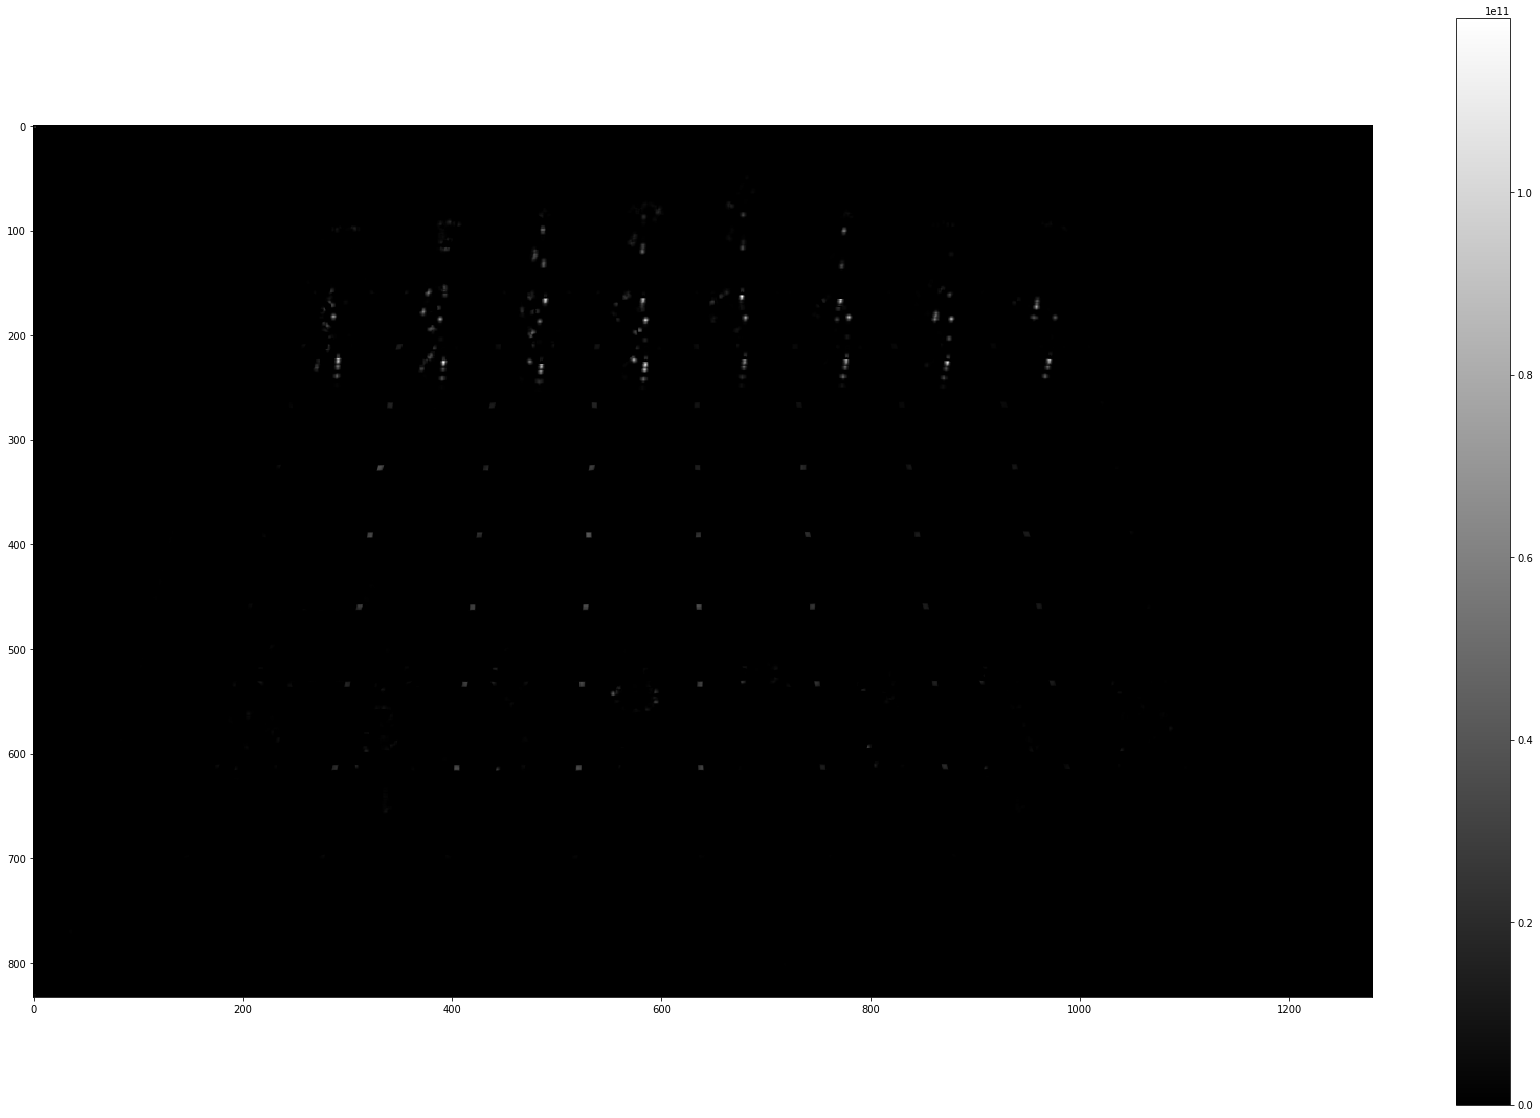

3.3 - Harris corner detection  - rotated images
3.1 - Debug
Image shape:  (833, 1280)
Sigma:  0.2
K:  0.1
gdx and gdy - DONE
gdx shape:  (1, 3)  - gdy shape:  (3, 1)
Now convolving x and y derivatives ...
ix: - DONE
ix shape:  (833, 1280)
iy: - DONE
iy shape:  (833, 1280)
ix2 shape:  (833, 1280)
ixy shape:  (833, 1280)
iy2 shape:  (833, 1280)
Now convolving with unit matrix to opptain sums of products...
DONE
Sx2 shape:  (833, 1280)
Sxy shape:  (833, 1280)
Sy2 shape:  (833, 1280)
Calculating R image...
R shape:  (833, 1280)
R interval: [ -98353313149.12624  :  118328807403.75606 ]
Replacing values under threshold  5506.6164487016795  by 0


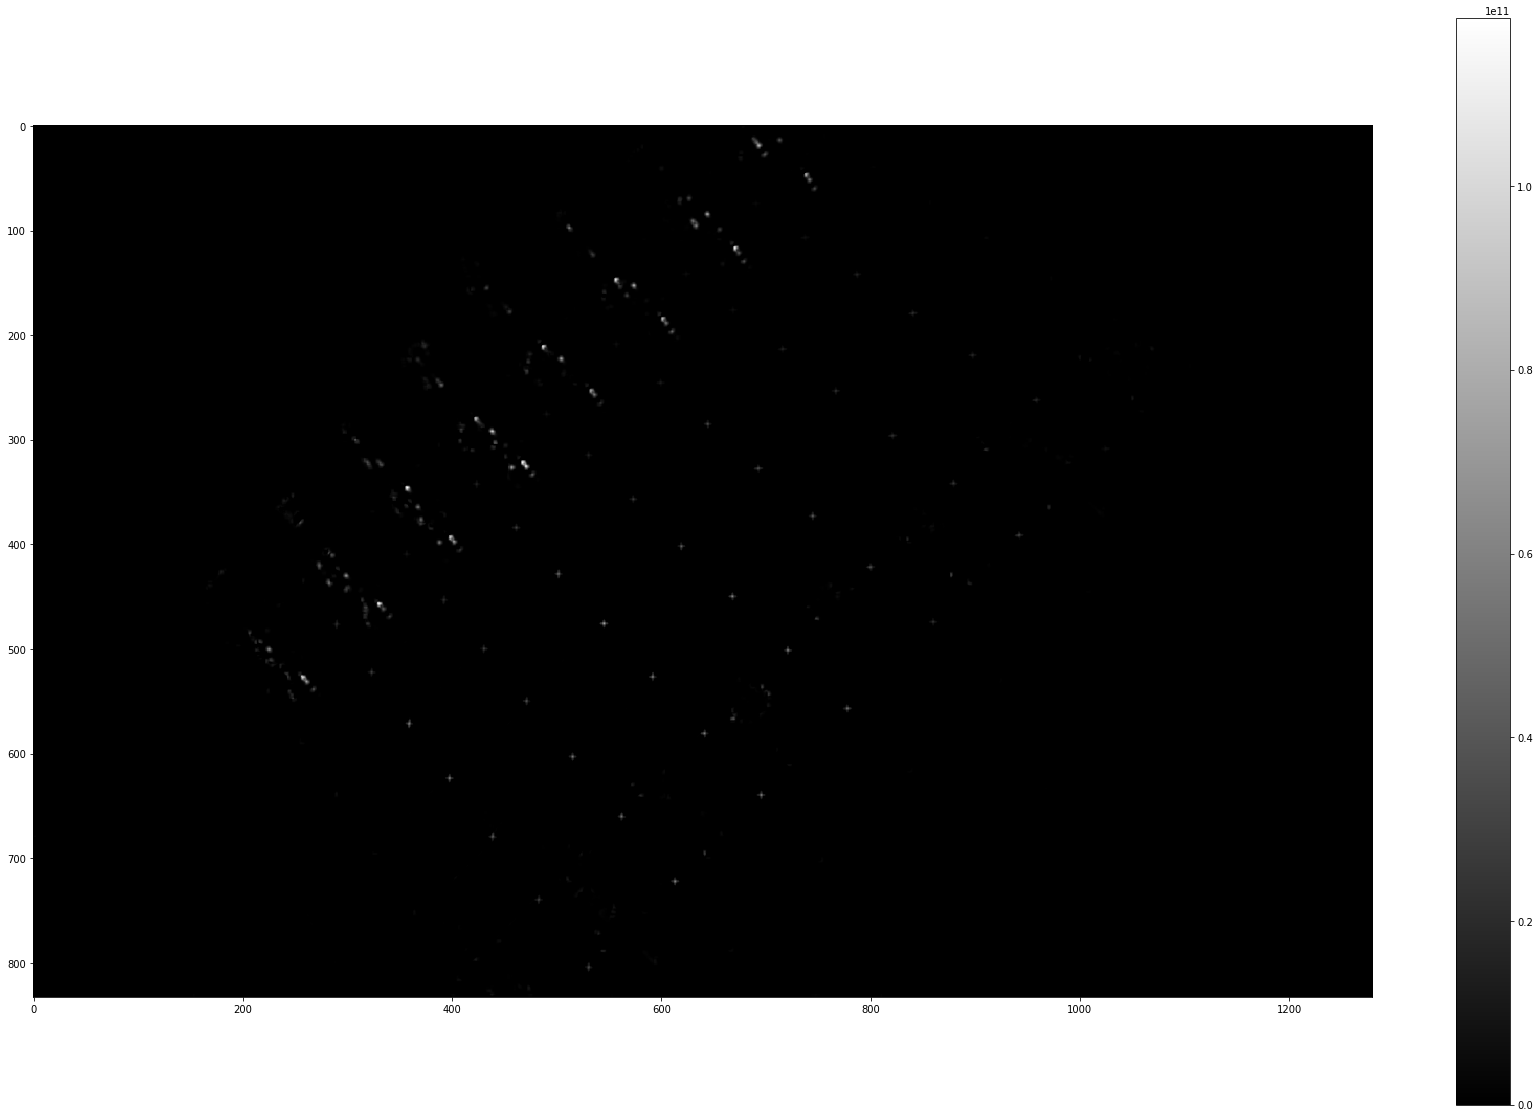

3.1 - Debug
Image shape:  (833, 1280)
Sigma:  0.2
K:  0.1
gdx and gdy - DONE
gdx shape:  (1, 3)  - gdy shape:  (3, 1)
Now convolving x and y derivatives ...
ix: - DONE
ix shape:  (833, 1280)
iy: - DONE
iy shape:  (833, 1280)
ix2 shape:  (833, 1280)
ixy shape:  (833, 1280)
iy2 shape:  (833, 1280)
Now convolving with unit matrix to opptain sums of products...
DONE
Sx2 shape:  (833, 1280)
Sxy shape:  (833, 1280)
Sy2 shape:  (833, 1280)
Calculating R image...
R shape:  (833, 1280)
R interval: [ -95850579381.62639  :  121167005785.2617 ]
Replacing values under threshold  5506.6164487016795  by 0


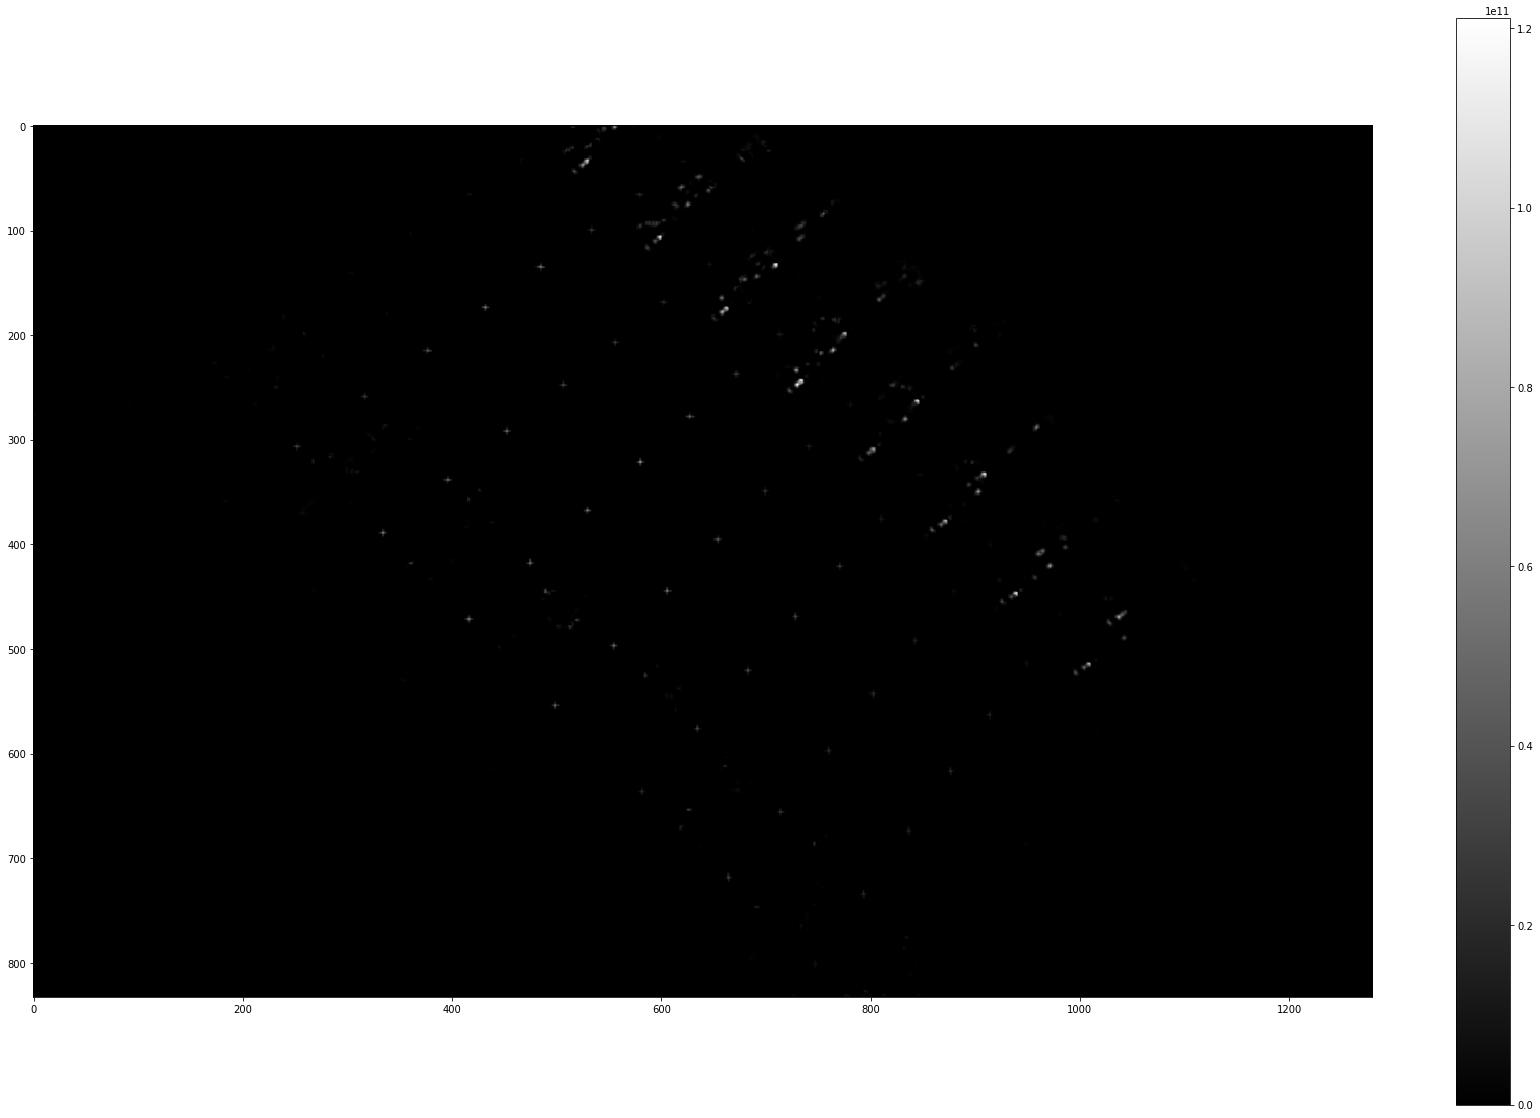

3.4 - Harris corner detection down scaled images
3.1 - Debug
Image shape:  (416, 640)
Sigma:  0.2
K:  0.1
gdx and gdy - DONE
gdx shape:  (1, 3)  - gdy shape:  (3, 1)
Now convolving x and y derivatives ...
ix: - DONE
ix shape:  (416, 640)
iy: - DONE
iy shape:  (416, 640)
ix2 shape:  (416, 640)
ixy shape:  (416, 640)
iy2 shape:  (416, 640)
Now convolving with unit matrix to opptain sums of products...
DONE
Sx2 shape:  (416, 640)
Sxy shape:  (416, 640)
Sy2 shape:  (416, 640)
Calculating R image...
R shape:  (416, 640)
R interval: [ -38966344315.70681  :  42114629493.521805 ]
Replacing values under threshold  5506.6164487016795  by 0


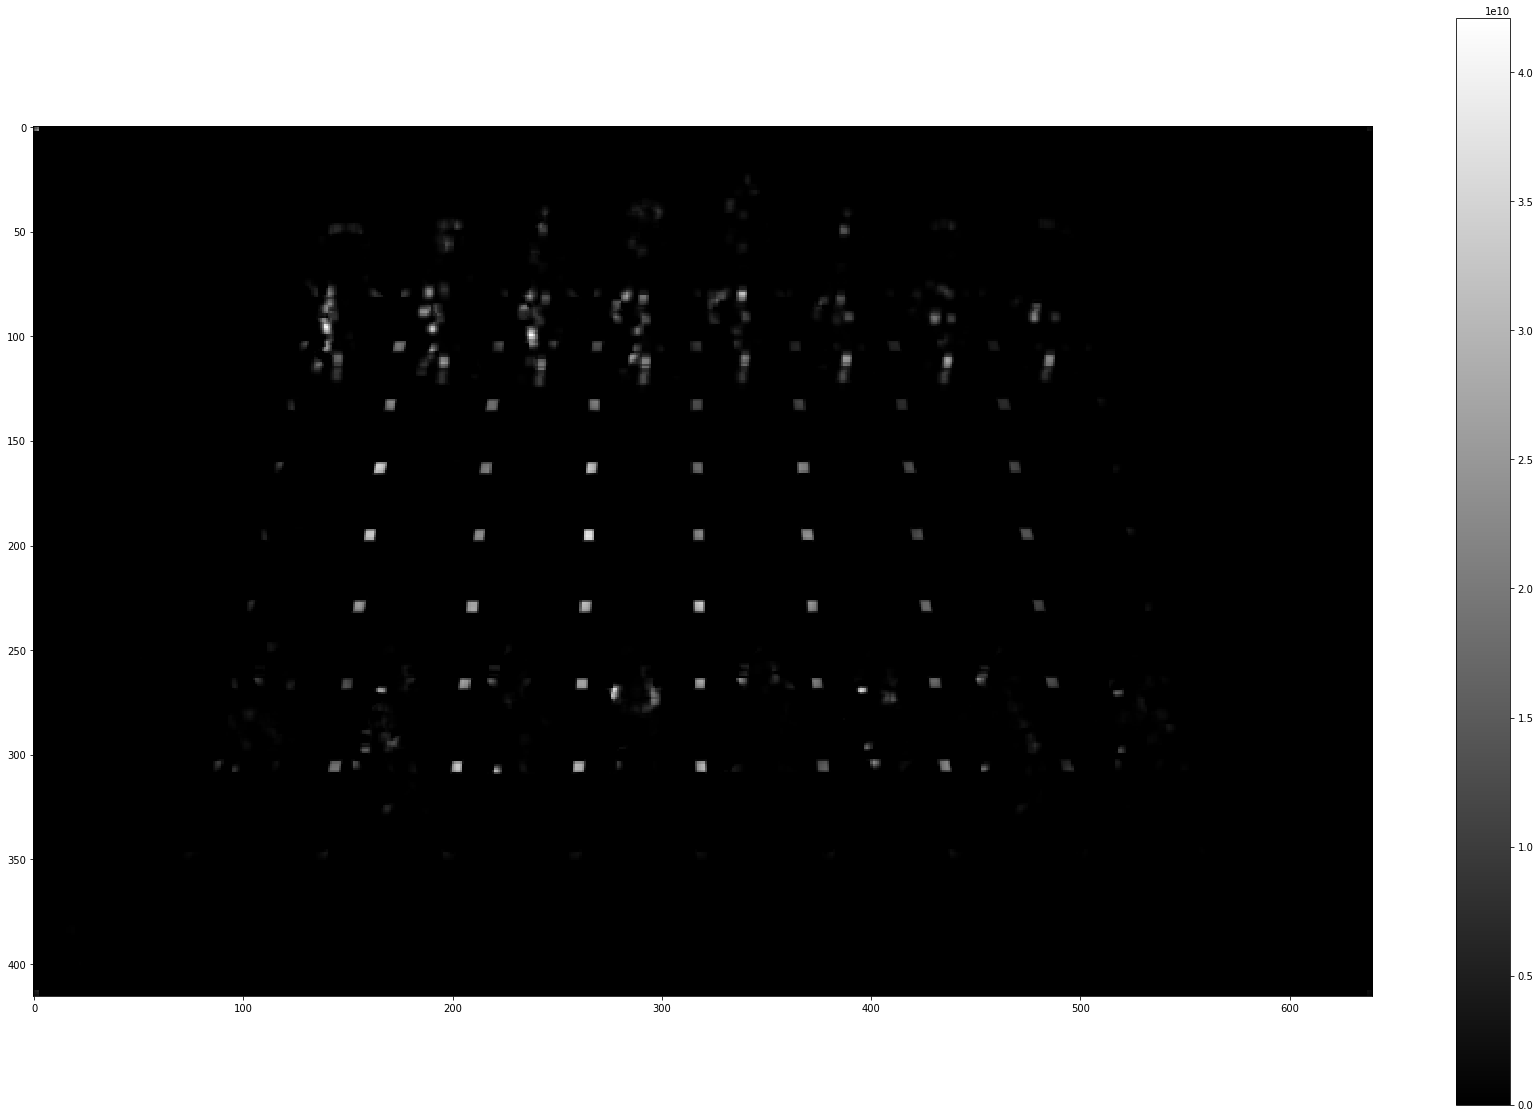

In [26]:
""" 3 Corner detection """

# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams["figure.figsize"] = (30,20)
from scipy.signal import convolve2d, convolve
from skimage import color, io
import pdb

# Added 
from PIL import Image
from scipy import ndimage, misc # used for roration

img = io.imread('chessboard.jpg')


# 3.0 - import functions
def myconv2(image, filt, correct_margins = False):
    m = image.shape[0] # height
    n = image.shape[1] # width
    (k,l) = filt.shape
    filtered_img = np.zeros((m + k - 1, n + l - 1))
    filt_h = k // 2
    filt_w = l // 2
    pad_image = np.zeros((m + k - 1, n + l - 1))
    pad_image[filt_h:filt_h + m, filt_w:filt_w + n] = image[:,:]
    flat_rev_filt = np.flip(filt.flatten(), axis=0)
    fs = sum(flat_rev_filt)
    if(fs == 0):
        fs = 1
    
    for h in range(filt_h, m + filt_h):
        for w in range(filt_w, n + filt_w): 
            window = pad_image[h - filt_h : h + filt_h + 1, w - filt_w : w + filt_w + 1]
            val = (1/fs)*np.sum(np.multiply(flat_rev_filt, window.flatten()))
            filtered_img[h,w] = val
    
    if(correct_margins):
        return filtered_img[filt_h : m + filt_h, filt_w : n + filt_w]
    return filtered_img

def gauss1d(sigma, filter_length=11):
    if(not(filter_length%2)):
        filter_length += 1
    lim = int(filter_length/2)
    x = np.array(range(-lim,lim+1,1)) 
    gauss_filter = np.exp(-(x**2/(2*(sigma**2))))
    gauss_filter = gauss_filter/sum(gauss_filter)
    return gauss_filter[np.newaxis, :]



# 3.1
# Write a function myharris(image) which computes the harris corner for each pixel in the image. The function should return the R
# response at each location of the image.
# HINT: You may have to play with different parameters to have appropriate R maps.
# Try Gaussian smoothing with sigma=0.2, Gradient summing over a 5x5 region around each pixel and k = 0.1.)
def myharris(image, w_size, sigma, k, verbose=True):
    # This function computes the harris corner for each pixel in the image
    # INPUTS
    # @image    : a 2-D image as a numpy array
    # @w_size   : an integer denoting the size of the window over which the gradients will be summed
    # sigma     : gaussian smoothing sigma parameter
    # k         : harris corner constant
    # OUTPUTS
    # @R        : 2-D numpy array of same size as image, containing the R response for each image location

    ### your code should go here ###
    
    img_height = image.shape[0]
    img_width = image.shape[1]
    
    if verbose:
        print("3.1 - Debug")
        print("Image shape: ", image.shape)
        print("Sigma: ", sigma)
        print("K: ", k)
    
    # Derivative for x: the transpose is used for y after gaussian convolution bellow
    dx = np.array((-1, 0, 1))[np.newaxis, :]
    
    # Note: -the parameter correct_margins remove the additional margins added for convolution for myconv2",
    #       -correction for padding with convolve 2d is 'same'
    
    gdx = myconv2(dx, gauss1d(sigma, 3), True)
    gdy = gdx.T
    
    if verbose:
        print("gdx and gdy - DONE")
        print("gdx shape: ", gdx.shape, " - gdy shape: ", gdy.shape)
        print("Now convolving x and y derivatives ...")
    
    #ix = convolve(image, gdx, 'same')
    #iy = convolve(image, gdy, 'same')
    
    
    ix = myconv2(image, gdx, True)
    if verbose:
        print("ix: - DONE")
        print("ix shape: ", ix.shape)
        
    iy = myconv2(image, gdy, True)
    if verbose:
        print("iy: - DONE")
        print("iy shape: ", iy.shape)
    
    # Product of derivatives at each pixel
    ix2 = ix * ix
    ixy = ix * iy
    iy2 = iy * iy
    
    if verbose: 
        print("ix2 shape: ", ix2.shape)
        print("ixy shape: ", ixy.shape)
        print("iy2 shape: ", iy2.shape)
        print("Now convolving with unit matrix to opptain sums of products...")
    
    
    # Sums of products of derivatives at each pixel - convolve with a matrix of 1
    i1 = np.ones((w_size, w_size))
    sx2 = convolve2d(ix2, i1, 'same')
    sxy = convolve2d(ixy, i1, 'same')
    sy2 = convolve2d(iy2, i1, 'same')
    
    if verbose:
        print("DONE")
        print("Sx2 shape: ", sx2.shape)
        print("Sxy shape: ", sxy.shape)
        print("Sy2 shape: ", sy2.shape)
        print("Calculating R image...")
    
    # Define at each pixel the H matrix
    
    #H = np.empty((img_height, img_width, 2,2))
    #det = np.empty((img_height, img_width))
    #trace = np.empty((img_height, img_width))
    
    R = np.empty((img_height, img_width))
    
    for x in range(0, img_height):
        for y in range(0, img_width):
            
            local_H = np.array([sx2[x,y], sxy[x,y], sxy[x,y], sy2[x,y]]).reshape((2,2))
            #H[x,y] = local_H
            local_det = np.linalg.det(local_H)
            #det[x,y] = np.linalg.det(local_H)
            local_trace = np.trace(local_H)
            #trace[x,y] = np.trace(local_H)
            R[x,y] = local_det - k * (local_trace)**2
    
    # Before thresholding: big gray ugly pictures where we can see the lines (not only the corners)
    # After thresholding: nice dark pictures with only the corners appearing. 
    threshold = 0.25*np.exp(10)
    
    if verbose:
        print("R shape: ", R.shape)
        print("R interval: [", np.amin(R), " : ", np.amax(R), "]")
        print("Replacing values under threshold ", threshold, " by 0")
    R[R < threshold] = 0 
    return R


# 3.2
# Evaluate myharris on the image
print("3.2 - Harris corner detection function")
R = myharris(img, 5, 0.2, 0.1)
print("Done - display image")
plt.imshow(R)
plt.colorbar()
plt.show()


# 3.3
print("3.3 - Harris corner detection  - rotated images")
# Repeat with rotated image by 45 degrees
# HINT: Use scipy.ndimage.rotate() function
img_plus_45 = ndimage.rotate(img, 45, reshape=False)
R_rotated = myharris(img_plus_45, 5, 0.2, 0.1)    
plt.imshow(R_rotated)
plt.colorbar()
plt.show()

img_minus_45 = ndimage.rotate(img, -45, reshape=False)
R_rotated = myharris(img_minus_45, 5, 0.2, 0.1)    
plt.imshow(R_rotated)
plt.colorbar()
plt.show()

# 3.4
print("3.4 - Harris corner detection down scaled images")
# Repeat with downscaled image by a factor of half
# HINT: Use scipy.misc.imresize() function # DEPRECATED #
#  - Check : https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.misc.imresize.html
# Note: shape of nd.array and Image are reversed
new_size = (img.shape[1]//2, img.shape[0]//2)
img_scaled = np.array(Image.fromarray(img).resize(new_size))
R_scaled =  myharris(img_scaled, 5, 0.2, 0.1)    ### your code should go here ###
plt.imshow(R_scaled)
plt.colorbar()
plt.show()
